# 10과 [실습] 범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 다이아몬드 가격  
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 다이아몬드 가격
diamonds = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv')
diamonds = diamonds.sample(3000, random_state = 2022)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
27207,2.02,Very Good,F,SI1,62.7,59.0,17530,7.97,8.03,5.02
22207,1.50,Good,H,VS1,63.4,59.0,10256,7.20,7.29,4.59


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


범주별 숫자를 비교할 때 사용되는 방식은 범주별 평균 비교 입니다.  


## 2.범주 --> 숫자 : 시각화

① titanic 생존여부에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

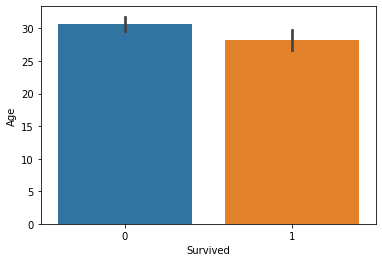

In [6]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x='Survived', y='Age', data=titanic)
plt.show()

* 박스플롯으로 시각화 해 봅시다.

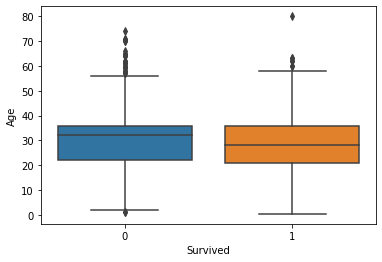

In [7]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

* 위 두 범주간에 평균에 차이가 있나요?

> - barplot은 평균, 신뢰범위를 나타낸다. 
>    - 생존자의 평균 나이는 30대이며, 사망자의 평균나이는 25~30이다.
> - boxplot은 4분위수를 기준으로 데이터가 얼마나 몰려있는지 확인할 수 있다.
>    - 사망자의 대다수는 20 ~ 35세로 구성되어있으며, 생존자는 20 ~ 37세정도로 구성되어있다.

② titanic 성별에 따라 운임에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

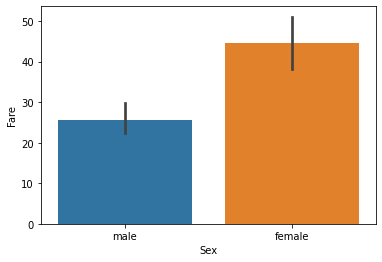

In [8]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x='Sex', y='Fare', data=titanic)
plt.show()

* 박스플롯으로 시각화 해 봅시다.

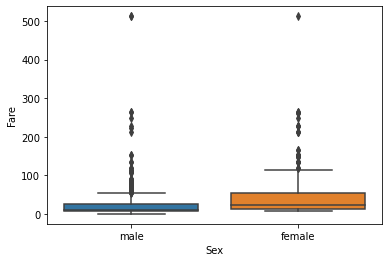

In [10]:
sns.boxplot(x='Sex', y='Fare', data=titanic)
plt.show()

* 위 범주간 평균에 차이가 있나요?

> 이상치가 많이 존재하며, 신뢰범위가 넓기 때문에 평균의 신빙성이 떨어진다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

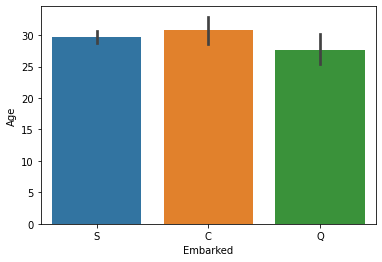

In [11]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x='Embarked', y='Age', data=titanic)
plt.show()

* 박스플롯으로 시각화 해 봅시다.

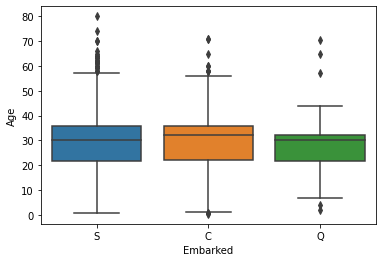

In [12]:
sns.boxplot(x='Embarked', y='Age', data=titanic)
plt.show()

* 위 범주간 평균에 차이가 있나요?

> S는 신뢰범위가 가장 좁기 때문에 평균적인 의미가 높을수 있다. 중간값과 평균값과 어느정도 일치한다.  
> 그러나, C와 Q의 경우에는 신뢰범위가 넓다.

④ diamonds color에 따른 가격에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

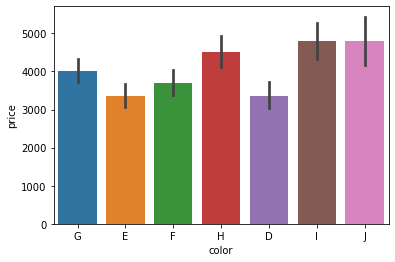

In [14]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x='color', y='price', data=diamonds)
plt.show()

* 박스플롯으로 시각화 해 봅시다.

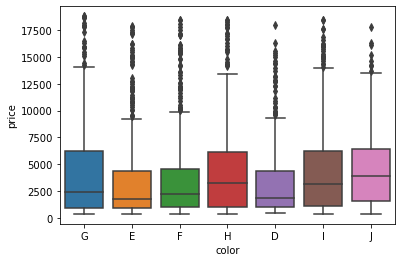

In [16]:
sns.boxplot(x='color', y='price', data=diamonds)
plt.show()

* 위 범주간 평균에 차이가 있나요?

> I,J의 경우에는 특히 신뢰범위가 넓어 평균을 신뢰하기 어렵다.  
> 대부분의 경우 신뢰범위가 넓어 평균값이 전체를 대표한다 보기 어렵다

## 3.수치화 : t-test(두 범주), anova(세 범주 이상)

① titanic 생존여부에 따라 나이에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [18]:
# 먼저 범주별로 데이터를 나눕시다.
temp = titanic.loc[titanic['Age'].notnull()]

died = temp.loc[temp['Survived']==0, 'Age'] 
survived = temp.loc[temp['Survived']==1, 'Age']

In [19]:
# t-test를 수행
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.6686741711011606, pvalue=0.007753857024893963)

* t-test 결과를 해석해 봅시다.

> t-test결과, pvalue가 0.007 < 0.05이다. 따라서 타이타닉의 생존여부와 나이는 관계가 있다.

② titanic 성별에 따라 운임에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [22]:
# 먼저 범주별로 데이터를 나눕시다.
male = titanic.loc[titanic['Sex'] == 'male', 'Fare']
female = titanic.loc[titanic['Sex'] == 'female', 'Fare']

In [23]:
# t-test를 수행
spst.ttest_ind(male, female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

* t-test 결과를 해석해 봅시다.

> p_value의 결과값이 e-08으로 설정되었다 따라서 타이타닉에 탄 성별에 따라 운임에 차이가 존재한다는 것을 알 수 있다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

In [27]:
# 먼저 범주별로 데이터를 나눕시다.
c1 = titanic.loc[titanic['Embarked'] == 'S', 'Age']
c2 = titanic.loc[titanic['Embarked'] == 'C', 'Age']
c3 = titanic.loc[titanic['Embarked'] == 'Q', 'Age']

In [28]:
# anova를 수행
spst.f_oneway(c1, c2, c3)

F_onewayResult(statistic=1.5519517205674485, pvalue=0.2124081352616724)

* anova 결과를 해석해 봅시다.

> p_value의 값이 0.05 이상이기 때문에 [승선지역에 따른 나이의 차이]의 가설은 참일 가능성이 낮다.

④ diamonds color에 따른 가격에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

In [35]:
# 먼저 범주별로 데이터를 나눕시다.
print(diamonds['color'].value_counts())
p1 = diamonds.loc[diamonds['color'] == 'G', 'price']
p2 = diamonds.loc[diamonds['color'] == 'E', 'price']
p3 = diamonds.loc[diamonds['color'] == 'F', 'price']
p4 = diamonds.loc[diamonds['color'] == 'H', 'price']
p5 = diamonds.loc[diamonds['color'] == 'D', 'price']
p6 = diamonds.loc[diamonds['color'] == 'I', 'price']
p7 = diamonds.loc[diamonds['color'] == 'J', 'price']

G    628
E    558
F    533
H    426
D    375
I    315
J    165
Name: color, dtype: int64


In [36]:
# anova를 수행
spst.f_oneway(p1, p2, p3, p4, p5, p6, p7)

F_onewayResult(statistic=8.748551345095594, pvalue=1.80447619297854e-09)

* anova 결과를 해석해 봅시다.

> p-value의값이 e-08이므로 [diamonds color에 따라 가격이 차이가 날 것이다] 라는 가설은 참일 가능성이 높다.  
> 이유는 만약 가설이 참이라고 할 때 거짓으로 나올 확률이 거의 0%에 수렴하기 때문이다.